# Classify Images of Dumbledore & Gandalf


## Introduction
In this challenge we will train a neural network to distinguish between two different types of images using convolutional nerual networks.

In particular, we will train a model that can distinguish between images of Gandalf (from _Lord of the Rings_) and Dumbledore (from _Harry Potter_).

This is a challenging visual task for a few reasons:
 * Both are grey-bearded old white men
 * Both wear wizard robes and hats
 * Two different actors played Dumbledore (yes, we will ignore the Jude Law incarnation), Richard Harris and Michael Gambon, and they did not look very much alike. In fact, you could argue that Michael Gambon looks much more like Ian McKellen than like Richark Harris.
 * Gandalf has two incarnations that look significantly different: Gandalf the Grey and Gandalf the White

With a very limited training set of images, this task would be close to impossible if we were training a neural network from scratch.

Thankfully, but we will not start from scratch. We will use Transfer Learning to benefit from the representations learned by other networks previously trained on huge datasets with many image classes, and apply those representations to our much more specific problem, with much more limited data.

## Setup

In [10]:
!pip install googledrivedownloader sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_learn-1.0.2-cp39-cp39-macosx_12_0_arm64.whl (6.9 MB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=00a5e447d892ccc4281ce20eab9548a69a498a72f17d0d66301d7249b1fb9d53
  Stored in directory: /Users/aaron/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [23]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
from skimage import io

import shutil
import os

from torch.utils.data import Dataset, DataLoader, random_split

SEED = 1534  # Set this to whichever value you want and use this parameters in any seeded pseudorandom functions you use

## Dataset

### Constants

In [13]:
IMAGE_SHAPE = (224, 224)
TRAINING_SET_PATH = "./data/training/"
VALIDATION_SET_PATH = "./data/validation/"

### Create the training and the test dataset

In [24]:
!mkdir data
!mkdir ./data/training/
!mkdir ./data/validation/

mkdir: data: File exists


In [21]:
def get_train_data():
    DEST_PATH = './data/train_data.zip'
    
    gdd.download_file_from_google_drive(
        file_id = '16uUSJevLSCx4DO5x-FQ-2jVv43HH5UcP',
        dest_path = DEST_PATH,
    )
    shutil.unpack_archive(DEST_PATH, extract_dir="./data/")
    !rm ./data/train_data.zip
    !rm -rf ./data/__MACOSX

get_train_data()

The dataset has the following file structure:

```
data
  |_
    train_data
     |_ dumbledore
        |_ dumbledore_0000.jpg
        |_ dumbledore_0001.jpg
        |_ dumbledore_0002.jpg
        |_ ...
     |_ gandalf
        |_ gandalf_0000.jpg
        |_ gandalf_0001.jpg
        |_ gandalf_0002.jpg
```

In [27]:
def plot_sample(i, TOTAL_COLUMNS, img):
  plt.subplot(1, 5, i)
  plt.imshow(np.asarray(img))

Dumbledore samples:


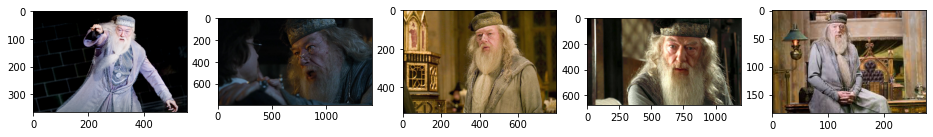

Gandalf samples:


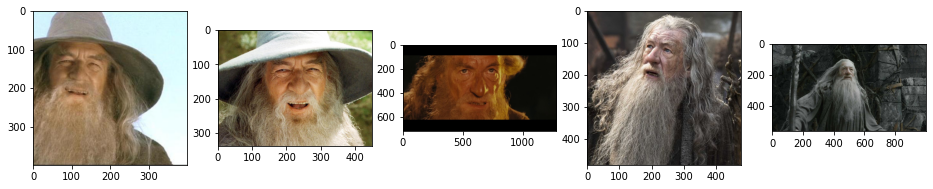

In [28]:
TOTAL_COLUMNS = 5
print("Dumbledore samples:")
plt.figure(figsize=(16, 10))
for i, dubledore_sample_path in enumerate(os.listdir("train_data/dumbledore")[:TOTAL_COLUMNS]):
  img = Image.open(f"train_data/dumbledore/{dubledore_sample_path}")
  plot_sample(i+1, TOTAL_COLUMNS, img)
plt.show()

print("Gandalf samples:")
plt.figure(figsize=(16, 10))
for i, gandalf_sample_path in enumerate(os.listdir("train_data/gandalf")[:TOTAL_COLUMNS]):
  img = Image.open(f"train_data/gandalf/{gandalf_sample_path}")
  plot_sample(i+1, TOTAL_COLUMNS, img)
plt.show()